In [22]:
import hhgen.plots as plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler

In [23]:
#best parameters: {'clip_weight': 30, 'learning_rate': 0.5, 'n_estimators': 300, 'subsample': 0.8, 
#'reg_lambda': 0.1, 'max_depth': 5}

features = ['hh_m','hh_pt', 'hh_eta','hgg_pt_hh_m','hbb_pt_hh_m','cos_theta_cs','cos_theta_hbb','cos_theta_hgg']
features+=['leadJet_pt','leadJet_eta','subleadJet_pt','subleadJet_eta']
features+=['leadPho_pt','leadPho_eta','subleadPho_pt','subleadPho_eta']

scaler=RobustScaler()

CPU times: user 57.1 s, sys: 1.73 s, total: 58.8 s
Wall time: 7.37 s
Weighted least squares for true/pred plot:  14.9347


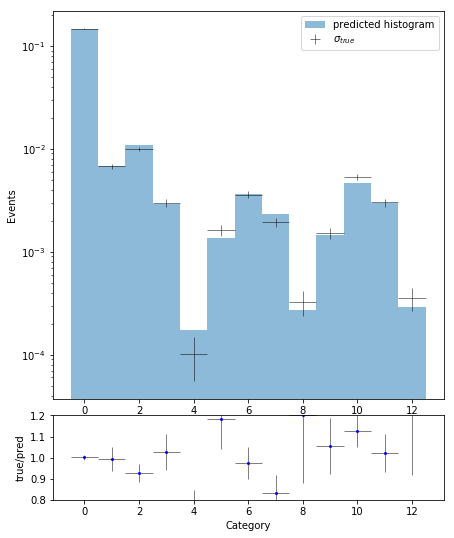

In [24]:
#node_SM
df=pd.read_hdf("node_SM.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,30)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=5, n_estimators=300, n_jobs=8, objective='multi:softmax', subsample=0.8,
                 reg_lambda=0.1, learning_rate=0.5)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 57.1 s, sys: 1.43 s, total: 58.6 s
Wall time: 7.33 s
Weighted least squares for true/pred plot:  17.3159


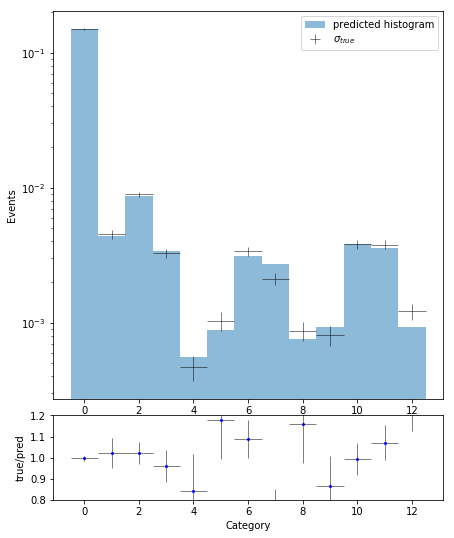

In [25]:
#node_box
df=pd.read_hdf("node_box.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,30)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=5, n_estimators=300, n_jobs=8, objective='multi:softmax', subsample=0.8,
                 reg_lambda=0.1, learning_rate=0.5)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 57 s, sys: 1.34 s, total: 58.4 s
Wall time: 7.31 s
Weighted least squares for true/pred plot:  22.1452


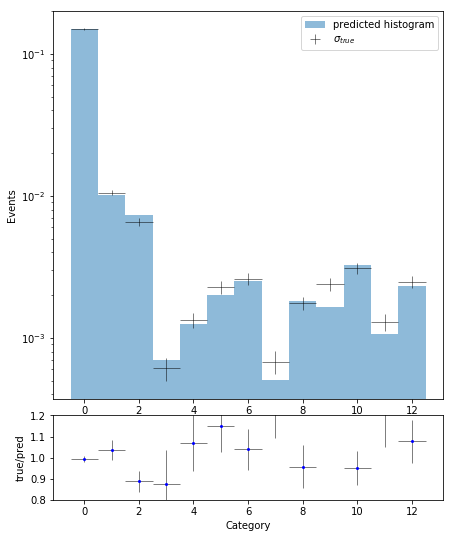

In [26]:
#node_2
df=pd.read_hdf("node_2.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,30)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=5, n_estimators=300, n_jobs=8, objective='multi:softmax', subsample=0.8,
                 reg_lambda=0.1, learning_rate=0.5)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 57.7 s, sys: 1.26 s, total: 59 s
Wall time: 7.39 s
Weighted least squares for true/pred plot:  20.0706


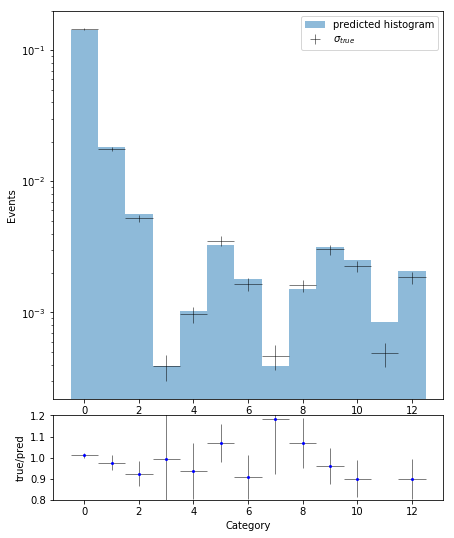

In [27]:
#node_3
df=pd.read_hdf("node_3.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,30)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=5, n_estimators=300, n_jobs=8, objective='multi:softmax', subsample=0.8,
                 reg_lambda=0.1, learning_rate=0.5)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 57.7 s, sys: 1.43 s, total: 59.1 s
Wall time: 7.4 s
Weighted least squares for true/pred plot:  8.64726


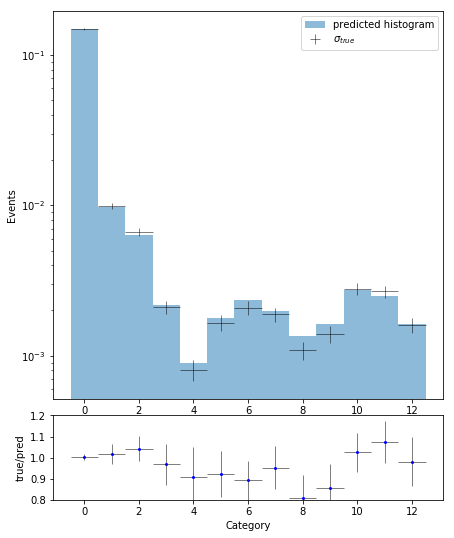

In [28]:
#node_4
df=pd.read_hdf("node_4.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,30)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=5, n_estimators=300, n_jobs=8, objective='multi:softmax', subsample=0.8,
                 reg_lambda=0.1, learning_rate=0.5)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 58 s, sys: 1.41 s, total: 59.4 s
Wall time: 7.44 s
Weighted least squares for true/pred plot:  16.4745


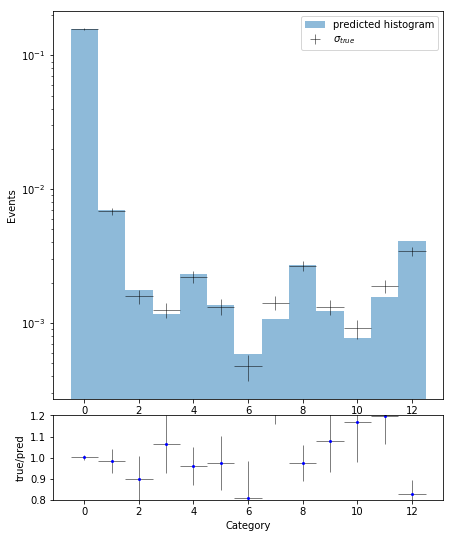

In [29]:
#node_5
df=pd.read_hdf("node_5.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,30)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=5, n_estimators=300, n_jobs=8, objective='multi:softmax', subsample=0.8,
                 reg_lambda=0.1, learning_rate=0.5)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 58.4 s, sys: 1.44 s, total: 59.9 s
Wall time: 7.55 s
Weighted least squares for true/pred plot:  20.4255


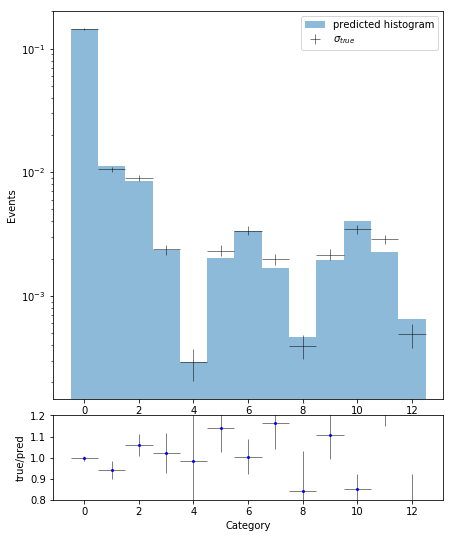

In [30]:
#node_6
df=pd.read_hdf("node_6.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,30)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=5, n_estimators=300, n_jobs=8, objective='multi:softmax', subsample=0.8,
                 reg_lambda=0.1, learning_rate=0.5)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 57 s, sys: 1.43 s, total: 58.4 s
Wall time: 7.32 s
Weighted least squares for true/pred plot:  17.3936


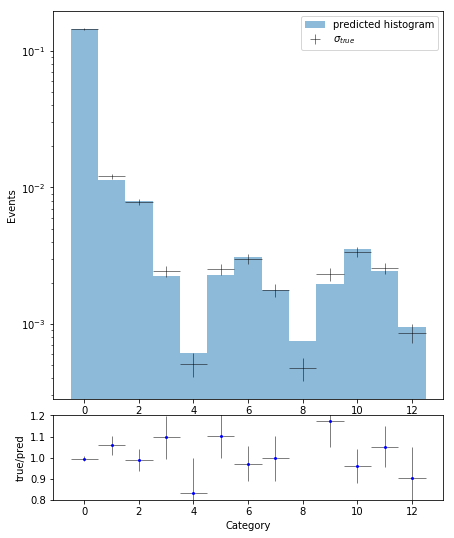

In [31]:
#node_7
df=pd.read_hdf("node_7.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,30)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=5, n_estimators=300, n_jobs=8, objective='multi:softmax', subsample=0.8,
                 reg_lambda=0.1, learning_rate=0.5)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 57 s, sys: 1.35 s, total: 58.4 s
Wall time: 7.31 s
Weighted least squares for true/pred plot:  19.777


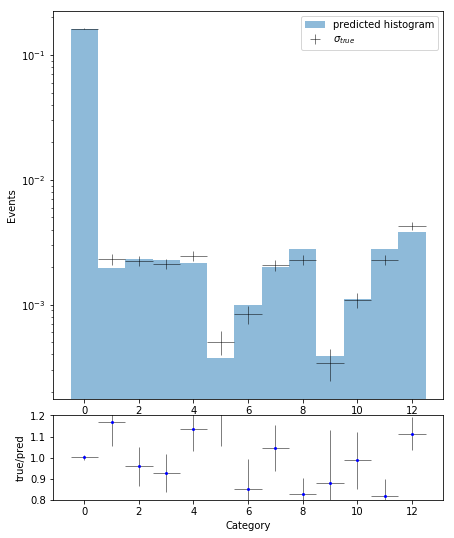

In [32]:
#node_8
df=pd.read_hdf("node_8.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,30)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=5, n_estimators=300, n_jobs=8, objective='multi:softmax', subsample=0.8,
                 reg_lambda=0.1, learning_rate=0.5)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 56.3 s, sys: 1.46 s, total: 57.8 s
Wall time: 7.24 s
Weighted least squares for true/pred plot:  7.15871


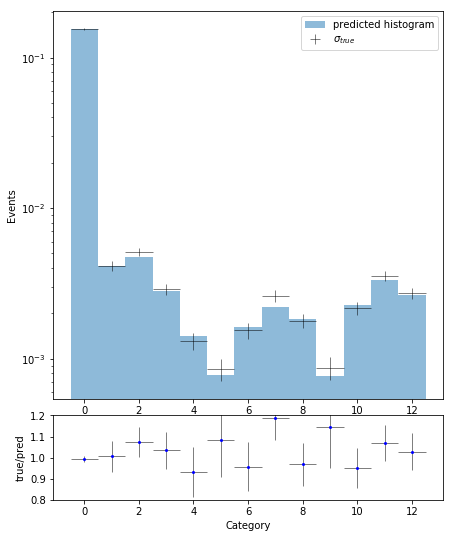

In [33]:
#node_9
df=pd.read_hdf("node_9.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,30)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=5, n_estimators=300, n_jobs=8, objective='multi:softmax', subsample=0.8,
                 reg_lambda=0.1, learning_rate=0.5)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 56.5 s, sys: 1.35 s, total: 57.9 s
Wall time: 7.25 s
Weighted least squares for true/pred plot:  13.1288


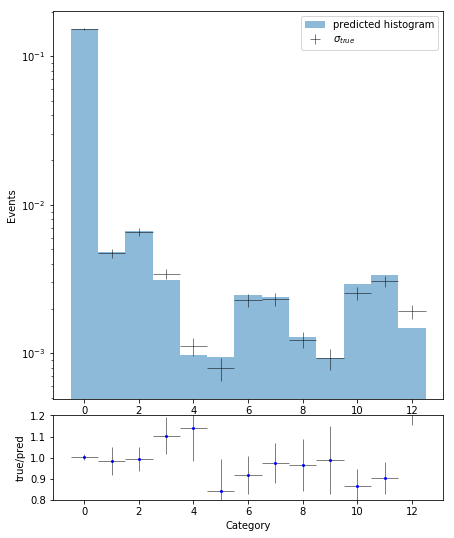

In [34]:
#node_10
df=pd.read_hdf("node_10.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,30)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=5, n_estimators=300, n_jobs=8, objective='multi:softmax', subsample=0.8,
                 reg_lambda=0.1, learning_rate=0.5)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 57 s, sys: 1.57 s, total: 58.5 s
Wall time: 7.33 s
Weighted least squares for true/pred plot:  12.0339


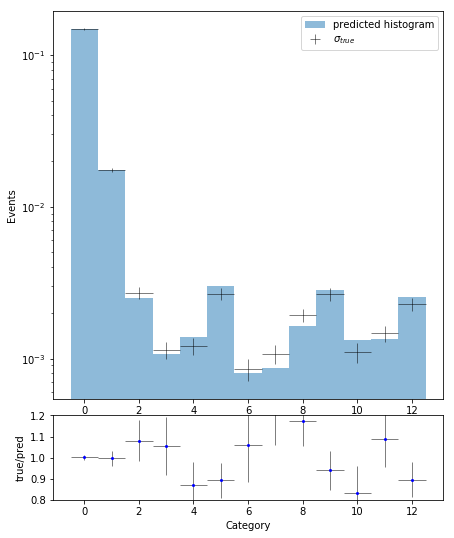

In [35]:
#node_11
df=pd.read_hdf("node_11.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,30)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=5, n_estimators=300, n_jobs=8, objective='multi:softmax', subsample=0.8,
                 reg_lambda=0.1, learning_rate=0.5)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 57.2 s, sys: 1.34 s, total: 58.5 s
Wall time: 7.33 s
Weighted least squares for true/pred plot:  12.7268


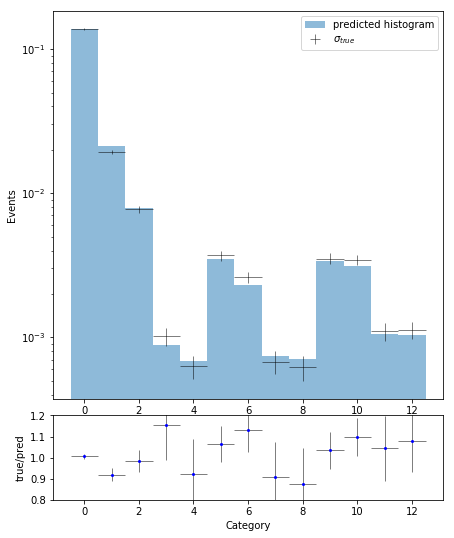

In [36]:
#node_12
df=pd.read_hdf("node_12.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,30)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=5, n_estimators=300, n_jobs=8, objective='multi:softmax', subsample=0.8,
                 reg_lambda=0.1, learning_rate=0.5)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

CPU times: user 57.7 s, sys: 1.39 s, total: 59.1 s
Wall time: 7.39 s
Weighted least squares for true/pred plot:  7.6538


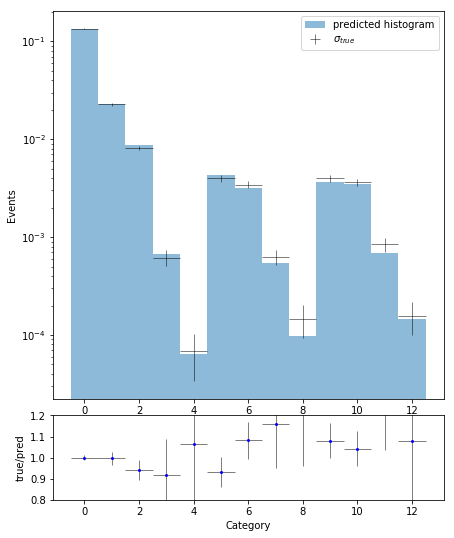

In [37]:
#node_13
df=pd.read_hdf("node_13.hd5")
X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

#reweighting and clipping it at optimum 
h=np.histogram(y_train,weights=w_train,bins=13,range=[-0.5,12.5])
a=1./h[0]
a/=min(a)
rw=np.clip(a,0,30)
w_train*=rw[y_train]

clf=XGBClassifier(max_depth=5, n_estimators=300, n_jobs=8, objective='multi:softmax', subsample=0.8,
                 reg_lambda=0.1, learning_rate=0.5)
%time clf.fit(X_train,y_train,w_train)

#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=y_pred_prob*w_test.reshape(-1,1)
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)